Question 2

In [207]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

a)

In [209]:
def process(x0,N,alpha):
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=alpha*x[i]*(1-x[i])
    return x


In [210]:
def data(x,tau):
    N=len(x)
    epsl=np.random.normal(0,tau,N)
    y=x+epsl
    return y


In [211]:
N=3
alpha=1.2
x0=0.2
tau=0.002
x=process(x0,N,alpha)
y=np.zeros((2000,2))

for i in range(2000):
    y[i]=data(x[1:N],tau)
y1=y[:,0]
y2=y[:,1]


<IPython.core.display.Javascript object>


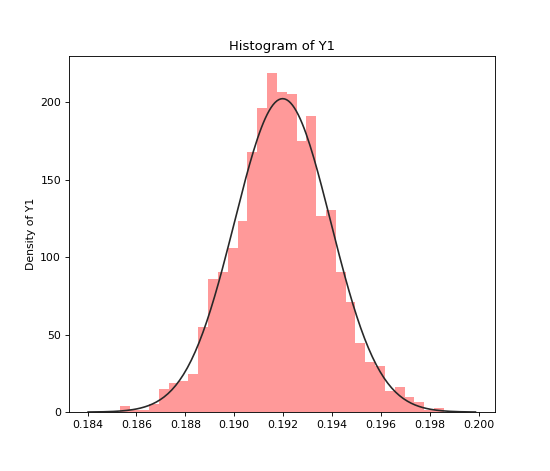

In [212]:
plt.figure(figsize=(7,6))
plt.title('Histogram of Y1')
sns.distplot(y[:,0],fit=norm,kde=False,color='r')
plt.ylabel('Density of Y1')
plt.show()

<IPython.core.display.Javascript object>


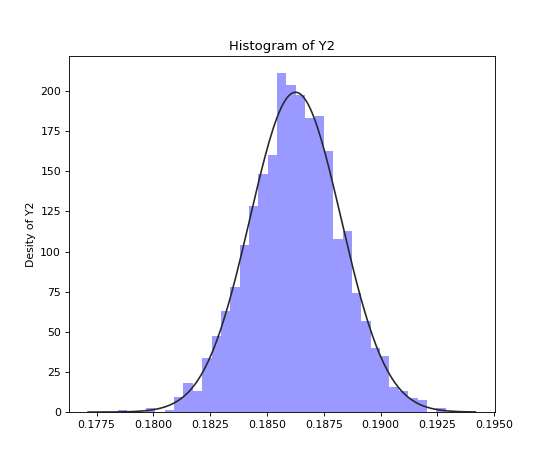

In [213]:
plt.figure(figsize=(7,6))
plt.title('Histogram of Y2')
sns.distplot(y[:,1],fit=norm,kde=False,color='b')
plt.ylabel('Desity of Y2')
plt.show()

The histograms of Y1 and Y2 shows that boh are normally distributed

b)

In [214]:
mean_y1=mean(y1)
print('mean of Y1 is' ,mean_y1)

mean of Y1 is 0.19198186873374323


In [215]:
mean_y2=mean(y2)
print('mean of Y2 is',mean_y2)

mean of Y2 is 0.1862530330283763


In [216]:
Cov_y=cov(y1,y2)
print('Covariance matrix of Y1,Y2 is',Cov_y)

Covariance matrix of Y1,Y2 is [[3.88653418e-06 4.10072559e-08]
 [4.10072559e-08 4.00814134e-06]]


c)

Given the cost function 
\begin{align*}
	J(x_o,y_1,y_2)=(x-y)^T(Cov(Y))^{-1}(x-y)
\end{align*}
Where (x-y)

\begin{equation*}
	(x-y)= 
	\begin{pmatrix}
		x_1-y_1 \\
		x_2-y_2
	\end{pmatrix}
\end{equation*}

Given that \begin{align*}
	X_{i+1}=\alpha X_i(1-X_i)
\end{align*}
Where $\alpha=1.2$


We rewrite (x-y) in terms of $x_o$ as 

\begin{equation*}
	(x-y)= 
	\begin{pmatrix}
		1.2x_o-1.2x_0^2-y_1 \\
		1.44x_o-3.168x_o^2+3.456x_o^3-1.728x_o^4-y_2
	\end{pmatrix}
\end{equation*}

In [217]:
def cost_funct(x0,y1,y2,Cov_of_Y):
    X_Y=np.array((1.2*x0-1.2*x0**2-y1,1.44*x0-3.168*x0**2+3.456*x0**3-1.728*x0**4-y2))
    J=X_Y@np.linalg.inv(Cov_of_Y)@X_Y.T
    return J

J=cost_funct(0.2,mean_y1,mean_y2,Cov_y)
J

0.002106783118068668

d)

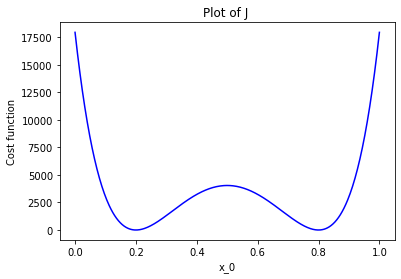

In [218]:
%matplotlib inline

x0_range=np.linspace(0,1,500)
J=np.zeros(len(x0_range))
for i in range(len(J)):
    J[i]=cost_funct(x0_range[i],mean_y1,mean_y2,Cov_y)

plot(x0_range,J,markersize=1,color='b')
title('Plot of J ')
ylabel('Cost function')
xlabel('x_0')
show()

e)

In [219]:

x0_range[argmin(J,axis=-1)]

0.2004008016032064

We can see that the minimum value is approximately 0.2

#### For the least squares

In [220]:
def cost_funl(x0,mean_y1,mean_y2):
    cost=(x0-mean_y1)**2+(x0-mean_y2)**2
    return cost

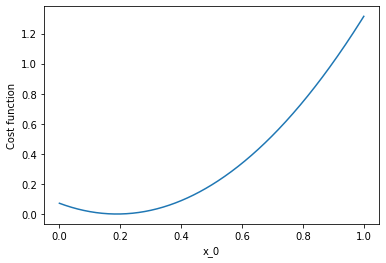

In [221]:

J1=zeros(len(x0_range))
for i in range(len(J1)):
    J1[i]=cost_funl(x0_range[i],mean_y1,mean_y2)
figure(2)
clf()
plot(x0_range,J1,markersize=1)
ylabel('Cost function')
xlabel('x_0')
show()

In [222]:
x0_range[argmin(J1)]

0.18837675350701402

We can see that the minimum estimate using MLE is 0.2004008016032064 and the estimate with the least squares estimate 0.18837675350701402
thus, the estimate with MLE is a bit more than that of least square. However, both approximates to the initial value of x0 that is 0.2 at 1 decimal place.